# Testing Kneed


In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df[["Income", "Spending"]]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [7]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [8]:
X_pre = num_pipe.fit_transform(X)
X_pre[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## KMeans inertia

In [9]:
from sklearn.cluster import KMeans

In [10]:
inertias = []
K = range(1, 15)

for i in K:
    km = KMeans(n_clusters=i, random_state=42).fit(X_pre)
    inertias.append(km.inertia_)

inertias

[400.0,
 273.66888662642015,
 157.70400815035947,
 109.22822707921345,
 65.5684081557168,
 60.13287487193422,
 49.668244837367986,
 37.319122878338824,
 32.49508119910091,
 30.05932269404221,
 26.76120176636121,
 26.232893769786838,
 23.193553421978397,
 21.195257238649532]

In [11]:
from kneed import KneeLocator

kneedle = KneeLocator(K, inertias, curve="convex", direction="decreasing")

elbow_k = kneedle.elbow

elbow_k

np.int64(5)

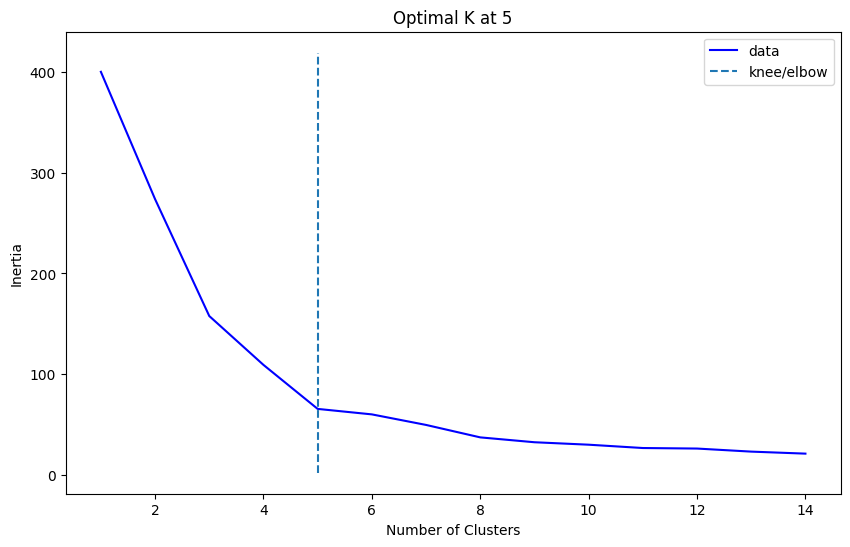

In [13]:
kneedle.plot_knee(
    figsize=(10, 6),
    xlabel= "Number of Clusters",
    ylabel= "Inertia",
    title= f"Optimal K at {elbow_k}",
)

In [14]:
labels = KMeans(n_clusters=elbow_k, random_state=42).fit_predict(X_pre)
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [15]:
X1 = X.copy()

In [16]:
X1["Cluster"] = labels
X1.head()

,Income,Spending,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

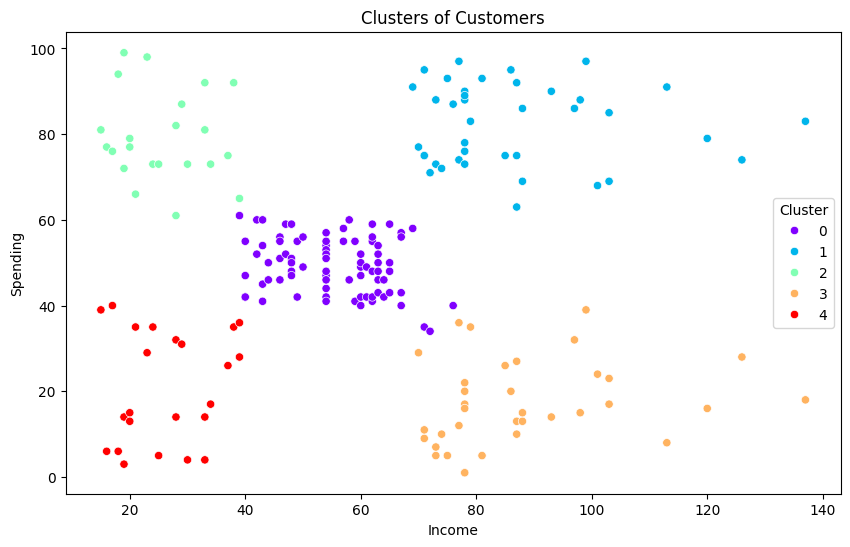

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X1, x="Income", y="Spending", hue="Cluster", palette="rainbow")
plt.title("Clusters of Customers")
plt.show()

In [20]:
for i in range(elbow_k):
    print(f"Cluster {i}:")
    print(X1[X1["Cluster"] == i].describe())
    print("\n")

Cluster 0:
          Income   Spending  Cluster
count  81.000000  81.000000     81.0
mean   55.296296  49.518519      0.0
std     8.988109   6.530909      0.0
min    39.000000  34.000000      0.0
25%    48.000000  44.000000      0.0
50%    54.000000  50.000000      0.0
75%    62.000000  55.000000      0.0
max    76.000000  61.000000      0.0


Cluster 1:
           Income   Spending  Cluster
count   39.000000  39.000000     39.0
mean    86.538462  82.128205      1.0
std     16.312485   9.364489      0.0
min     69.000000  63.000000      1.0
25%     75.500000  74.500000      1.0
50%     79.000000  83.000000      1.0
75%     95.000000  90.000000      1.0
max    137.000000  97.000000      1.0


Cluster 2:
          Income   Spending  Cluster
count  22.000000  22.000000     22.0
mean   25.727273  79.363636      2.0
std     7.566731  10.504174      0.0
min    15.000000  61.000000      2.0
25%    19.250000  73.000000      2.0
50%    24.500000  77.000000      2.0
75%    32.250000  85.750000  